In [113]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [114]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [115]:
pip install kaleido

Note: you may need to restart the kernel to use updated packages.


In [116]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [117]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

In [118]:
import warnings

# 경고 무시하기
warnings.filterwarnings("ignore")
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
# 한글 텍스트를 제대로 표시하기 위해 'font.family' 사용
plt.rcParams['font.family'] = 'AppleGothic'

In [119]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

## EDA 수행 과정

### 1. 데이터 로딩 및 확인: 데이터를 불러오고, 특징(열)과 샘플(행)을 살펴보기

In [120]:
# 최종 전세 파일 오픈 
housing_price = pd.read_csv('./data_1/강남구전세데이터_찐마지막.csv', encoding='utf-8')
housing_price.head()

,AD_Code,Admin_District,Area,YearBuilt,Type,Floor,Address,Cont_Date,Age,Latitude,Longitude,Star_Cnt,Michelin_Cnt,Mc_cnt,Bigstore_cnt,InterestRate,Market_cnt,Subway_cnt,Kinder_cnt,y
0,0,개포동,44.0,1989,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-06-01,34,37.473722,127.052725,0,0,0,0,4.04,0,0,2,7500
1,0,개포동,44.0,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-10-05,32,37.473722,127.052725,0,0,0,0,4.82,0,0,2,14333
2,0,개포동,44.0,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-07-07,32,37.473722,127.052725,0,0,0,0,4.16,0,0,2,17115
3,0,개포동,44.0,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-07-07,32,37.473722,127.052725,0,0,0,0,4.16,0,0,2,17640
4,0,개포동,44.0,1989,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-06-01,34,37.473722,127.052725,0,0,0,0,4.04,0,0,2,7500


In [121]:
df = housing_price

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87361 entries, 0 to 87360
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AD_Code         87361 non-null  int64  
 1   Admin_District  87361 non-null  object 
 2   Area            87361 non-null  float64
 3   YearBuilt       87361 non-null  int64  
 4   Type            87361 non-null  object 
 5   Floor           87361 non-null  float64
 6   Address         87361 non-null  object 
 7   Cont_Date       87361 non-null  object 
 8   Age             87361 non-null  int64  
 9   Latitude        87361 non-null  float64
 10  Longitude       87361 non-null  float64
 11  Star_Cnt        87361 non-null  int64  
 12  Michelin_Cnt    87361 non-null  int64  
 13  Mc_cnt          87361 non-null  int64  
 14  Bigstore_cnt    87361 non-null  int64  
 15  InterestRate    87361 non-null  float64
 16  Market_cnt      87361 non-null  int64  
 17  Subway_cnt      87361 non-null 

In [123]:
# Cont_Date 문자열 형태 -> datetime 으로 변경
df['Cont_Date'] = df['Cont_Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

### 2. 데이터 탐색: 기초 통계량, 데이터 분포, 이상치 등을 살펴보고 시각화를 활용하여 데이터를 이해

In [124]:
# 기술 통계 정보 요약 제공(평균, 표준편차, 최소값, 25%, 50%(중앙값), 75% 백분위수, 최대값)
df.describe()

,AD_Code,Area,YearBuilt,Floor,Age,Latitude,Longitude,Star_Cnt,Michelin_Cnt,Mc_cnt,Bigstore_cnt,InterestRate,Market_cnt,Subway_cnt,Kinder_cnt,y
count,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,8.736100e+04
mean,5.422694,67.776567,2000.491901,6.859915,22.508099,37.498124,127.057102,2.651034,1.253111,0.343162,0.528291,3.189517,0.132267,0.834732,1.074610,5.921226e+04
std,4.148519,37.183271,12.485836,5.758265,12.485836,0.015544,0.022320,2.424018,3.290181,0.520519,0.878938,0.669428,0.347259,0.811884,0.833464,4.606194e+04
min,0.000000,11.390000,1972.000000,-1.000000,0.000000,37.460288,127.018254,0.000000,0.000000,0.000000,0.000000,2.390000,0.000000,0.000000,0.000000,4.500000e+02
25%,2.000000,40.560000,1992.000000,3.000000,10.000000,37.488198,127.040612,0.000000,0.000000,0.000000,0.000000,2.560000,0.000000,0.000000,0.000000,2.520000e+04
50%,4.000000,59.920000,2002.000000,5.000000,21.000000,37.496665,127.051556,2.000000,0.000000,0.000000,0.000000,3.080000,0.000000,1.000000,1.000000,4.650000e+04
75%,9.000000,84.930000,2013.000000,10.000000,31.000000,37.508595,127.068504,4.000000,1.000000,1.000000,1.000000,3.510000,0.000000,1.000000,2.000000,8.000000e+04
max,13.000000,301.470000,2023.000000,67.000000,51.000000,37.533026,127.112686,10.000000,32.000000,2.000000,5.000000,4.820000,2.000000,3.000000,3.000000,1.100000e+06


In [125]:
# 데이터프레임의 문자열 열에 대한 기술 통계 요약 정보를 제공
# 결과로 문자열 열의 고유값 수, 최빈값, 데이터 개수, 유니크한 값 수 등이 출력. 
# 이를 통해 문자열 데이터의 특성을 파악
df.describe(include = 'object')

,Admin_District,Type,Address
count,87361,87361,87361
unique,14,4,3729
top,역삼동,아파트,서울특별시 강남구 삼성로 212
freq,14741,53963,2969


In [126]:
# 강남구 건물 건축년도 평균
df['YearBuilt'].mean()

2000.4919014205423

In [127]:
# 강남구 건물 평균적 연식
df['Age'].mean()

22.508098579457652

In [128]:
# 강남구 전세 이자율 평균
df['InterestRate'].mean()

3.1895174047922987

In [129]:
# 강남구 보증금 평균
df['y'].mean()

59212.25829603599

In [130]:
# 전세 보증금 중복값 제거 
df['y'].drop_duplicates().mean()

68727.807

###  분위수: df.quantile()

In [131]:
# 보증금 분위수 0.25
df['y'].quantile(0.25)

25200.0

In [132]:
# 0.25(25%) : 1사분위수(First Quartile) 로 데이터 25% 위치에 해당하는 값
# 0.5(50%) : 중앙값(Median) -> 데이터의 중간 값을 나타냄.
# 0.75(25%) : 3사분위수(Third Quartile) 로 데이터 25% 위치에 해당하는 값
df['y'].quantile([0.25, 0.5, 0.75])

0.25    25200.0
0.50    46500.0
0.75    80000.0
Name: y, dtype: float64

In [133]:
# 0.9(90%) : 데이터 90% 위치에 해당하는 값
df['y'].quantile(0.9)

120000.0

In [134]:
# unique() 메서드: 컬럼의 고유한 값 목록을 확인
print(df['AD_Code'].unique())
print(df['Admin_District'].unique())

[ 0  1  2  9  3  4  5  6  7 10 11 12 13  8]
['개포동' '논현동' '대치동' '역삼동' '도곡동' '삼성동' '세곡동' '수서동' '신사동' '율현동' '일원동' '자곡동'
 '청담동' '압구정동']


### 분산: df.var()

In [135]:
# 분산이란 데이터가 평균 주위에 얼마나 퍼져있는지를나타내는 중요한 통계량 중 하나
df['y'].var()

2121702395.9183118

In [136]:
df['Star_Cnt'].var()

5.875863427875852

### 표준편차: df.std()

In [137]:
# 데이터프레임의 각 열(Column)에 대한 표준 편차(standard deviation) 값을 계산하는 함수
# 표준 편차는 데이터의 분산 정도를 나타내는 지표, 값들이 평균으로부터 얼마나 퍼져 있는지 나타냄
df['y'].std()

46061.940861391326

### 최빈값 : df.mode()

In [138]:
### 범주형 변수의 경우에 사용, 해당 변수에서 가장 빈번하게 나타나는 범주를 파악하는데 사용
### 최빈값은 데이터의 분포를 이해하고, 특정 값이 데이터에서 얼마나 자주 나타나는지를 파악하는데 유용

# 보증금 최빈값
df['y'].mode()

0    50000
Name: y, dtype: int64

In [139]:
# 건축년도 최빈값
df['YearBuilt'].mode()

0    2014
Name: YearBuilt, dtype: int64

In [140]:
# 계약일자 최빈값
df['Cont_Date'].mode()

0   2022-05-11
Name: Cont_Date, dtype: datetime64[ns]

In [141]:
# 행개수, 컬럼개수 출력
print(df.shape)

(87361, 20)


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87361 entries, 0 to 87360
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   AD_Code         87361 non-null  int64         
 1   Admin_District  87361 non-null  object        
 2   Area            87361 non-null  float64       
 3   YearBuilt       87361 non-null  int64         
 4   Type            87361 non-null  object        
 5   Floor           87361 non-null  float64       
 6   Address         87361 non-null  object        
 7   Cont_Date       87361 non-null  datetime64[ns]
 8   Age             87361 non-null  int64         
 9   Latitude        87361 non-null  float64       
 10  Longitude       87361 non-null  float64       
 11  Star_Cnt        87361 non-null  int64         
 12  Michelin_Cnt    87361 non-null  int64         
 13  Mc_cnt          87361 non-null  int64         
 14  Bigstore_cnt    87361 non-null  int64         
 15  In

In [143]:
df['Cont_Date'].unique().max()

numpy.datetime64('2022-12-31T00:00:00.000000000')

### 분포 요약하기 

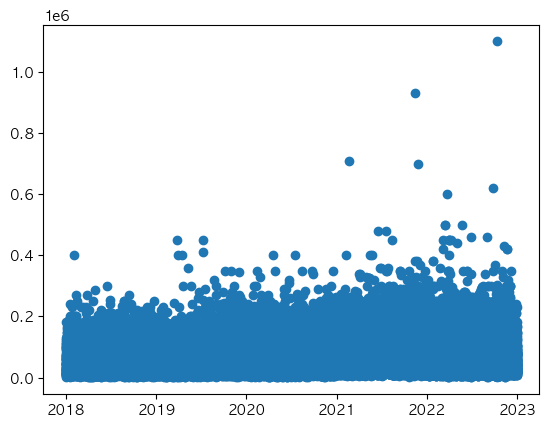

In [144]:
# 계약 기간 별로 보증금액 분포도 확인
import matplotlib.pyplot as plt
plt.scatter(df['Cont_Date'], df['y'])
plt.show()

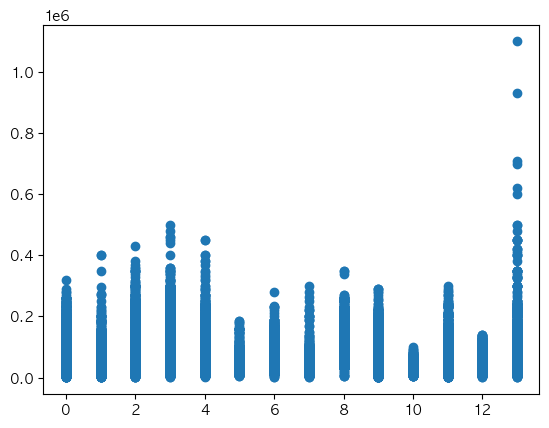

In [145]:
# 행정구역별 로 보증금 분포도 확인
# 행정구역 코드 13번인 청담동이 비싼 동네 ㅠ
plt.scatter(df['AD_Code'], df['y']) 
plt.show()

<Figure size 2000x1000 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '상관관계 알아보기')

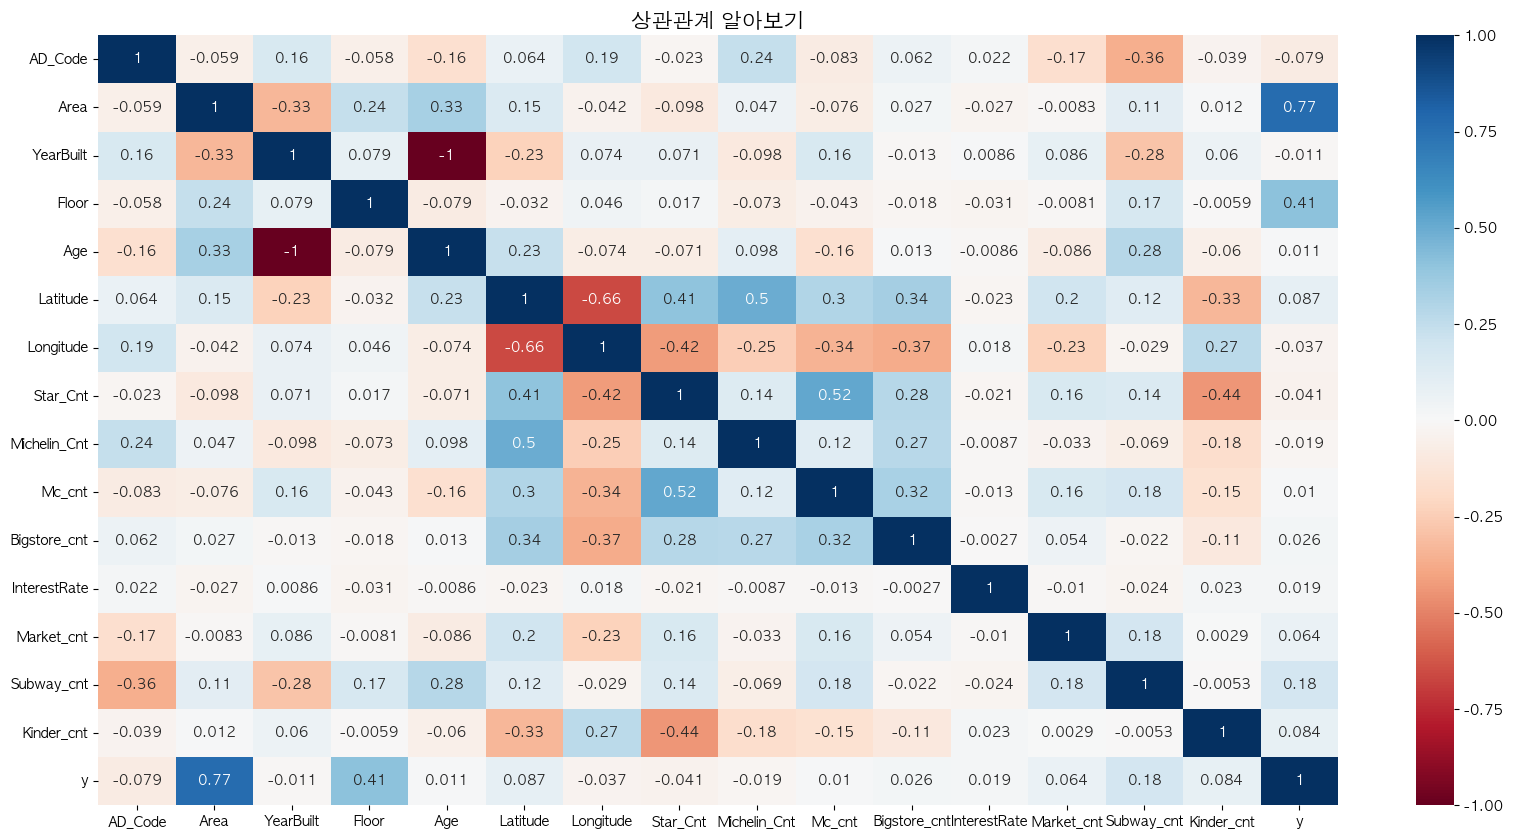

In [146]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="RdBu", annot=True)
plt.title("상관관계 알아보기", size=15)
plt.show()

In [147]:
# r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
# r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
# r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
# r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
# r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
# r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
# r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

### 가설1:  어떤 계절과 시기에 가격이 높은지? 여름?

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87361 entries, 0 to 87360
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   AD_Code         87361 non-null  int64         
 1   Admin_District  87361 non-null  object        
 2   Area            87361 non-null  float64       
 3   YearBuilt       87361 non-null  int64         
 4   Type            87361 non-null  object        
 5   Floor           87361 non-null  float64       
 6   Address         87361 non-null  object        
 7   Cont_Date       87361 non-null  datetime64[ns]
 8   Age             87361 non-null  int64         
 9   Latitude        87361 non-null  float64       
 10  Longitude       87361 non-null  float64       
 11  Star_Cnt        87361 non-null  int64         
 12  Michelin_Cnt    87361 non-null  int64         
 13  Mc_cnt          87361 non-null  int64         
 14  Bigstore_cnt    87361 non-null  int64         
 15  In

In [149]:
df['AD_Code'].value_counts()
df['Admin_District'].value_counts()
df['Type'].value_counts()

9     14741
2     13290
0     10842
3      7445
1      7022
4      6350
11     5586
8      4578
12     4458
6      4141
13     3962
5      2556
7      1624
10      766
Name: AD_Code, dtype: int64

역삼동     14741
대치동     13290
개포동     10842
도곡동      7445
논현동      7022
삼성동      6350
일원동      5586
압구정동     4578
자곡동      4458
수서동      4141
청담동      3962
세곡동      2556
신사동      1624
율현동       766
Name: Admin_District, dtype: int64

아파트      53963
연립다세대    15781
단독다가구     9472
오피스텔      8145
Name: Type, dtype: int64

In [150]:
df.groupby(['Admin_District', 'Type', 'Cont_Date'])['y'].max().sort_values(ascending=False).reset_index()

,Admin_District,Type,Cont_Date,y
0,청담동,아파트,2022-10-13,1100000
1,청담동,아파트,2021-11-12,930000
2,청담동,아파트,2021-02-19,710000
3,청담동,아파트,2021-11-25,700000
4,청담동,아파트,2022-09-27,620000
...,...,...,...,...
34699,신사동,연립다세대,2020-07-14,2000
34700,일원동,연립다세대,2018-01-17,2000
34701,일원동,단독다가구,2018-11-08,1500
34702,일원동,단독다가구,2019-11-20,1500


In [160]:
from IPython.display import Image

# 최종

# 강남구 계절별 보증금 비교 (sum 적용) -> 강남구 전체적으로 봤을 때 결과

In [151]:
# 월별로 계절 그룹화 함수 정의
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

# 계약년원일['Cont_Date'] 에서 연도와 월 정보를 추출하여 컬럼 추가
df['year'] = df['Cont_Date'].dt.year
df['month'] = df['Cont_Date'].dt.month
df['4seasons'] = df['month'].apply(get_season)

# 연도별, 월별, 계절별로 그룹화
grouped_by_season = df.groupby(['year', 'month', '4seasons'])['y'].sum().reset_index()

# 중복값 제거
grouped_by_season = grouped_by_season.drop_duplicates()

# IQR을 계산하여 이상치 제거
Q1 = grouped_by_season['y'].quantile(0.25)
Q3 = grouped_by_season['y'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_grouped = grouped_by_season[(grouped_by_season['y'] >= lower_bound) & (grouped_by_season['y'] <= upper_bound)]

print(grouped_by_season)

    year  month 4seasons          y
0   2018      1   Winter   76640949
1   2018      2   Winter   72050887
2   2018      3   Spring   82425650
3   2018      4   Spring   59471787
4   2018      5   Spring   66037407
5   2018      6   Summer   61900499
6   2018      7   Summer   61983672
7   2018      8   Summer   63322296
8   2018      9     Fall   63023537
9   2018     10     Fall   86824675
10  2018     11     Fall   71108125
11  2018     12   Winter   85741645
12  2019      1   Winter   80983800
13  2019      2   Winter   67862001
14  2019      3   Spring   67660520
15  2019      4   Spring   62424101
16  2019      5   Spring   67642385
17  2019      6   Summer   65248368
18  2019      7   Summer   70441155
19  2019      8   Summer   71055595
20  2019      9     Fall   63944138
21  2019     10     Fall   90213464
22  2019     11     Fall   99914501
23  2019     12   Winter  114865134
24  2020      1   Winter   85955319
25  2020      2   Winter   91933218
26  2020      3   Spring   6

In [152]:
# print(mean_by_season[mean_by_season.duplicated(['year', '4seasons'], keep=False)])

<Figure size 1000x600 with 0 Axes>

<AxesSubplot:xlabel='year', ylabel='y'>

Text(0.5, 1.0, '강남구 계절별 보증금 비교')

Text(0.5, 0, '연도')

Text(0, 0.5, '보증금')

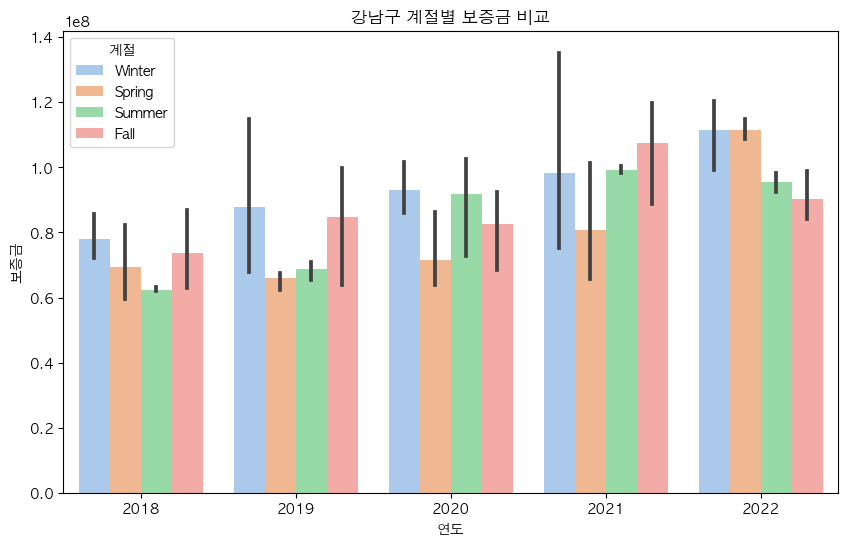

In [153]:
# 연도별, 계절별 보증금 비교 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='y', hue='4seasons', data=grouped_by_season, palette='pastel')
plt.title('강남구 계절별 보증금 비교')
plt.xlabel('연도')
plt.ylabel('보증금')
plt.legend(title='계절')
plt.show()

## 강남구 계절별 보증금 비교 결론(평균이 아닌 sum으로 했을 때 결과)
    
    * 연도별로 보증금이 높았던 계절
    
    1) 2018, 2019년, 2020년, 2022년: 겨울 가장 높음
    2) 2021년: 가을 가장 높음
    3) 2022년: 봄, 겨울 가장 높음(동일)
    
    * 연도별로 보증금이 낮았던 계절
    
    1) 2018년: 여름
    2) 2019년, 2020년, 2021년: 봄
    3) 2022년: 가을
    

## 겨울에 부동산 가격이 오르는 부분이 정권과의 어떤 연관?

    * 계절 중 겨울이 높았던 부분의 경우 sum 으로 했을 때, 가을의 경우 mean (평균 보증금) 적용시 제일 높음.

    * 매년 부동산 정책의 경우 겨울에 발표하기 때문에 대책 발표 직전부터 발표시부터 가격이 오르는 현상이 반복 -> 이유: 시작가부터 구매를 하고 싶어서 한꺼번에 수요가 몰림.
    
    * 주로 부동산 정책 발표가 매년 10월 ~ 2월 사이에 많이 발표되는 것으로 확인.

### 매년 정권 10월 - 2월 사이 정책 발표되는 부분 

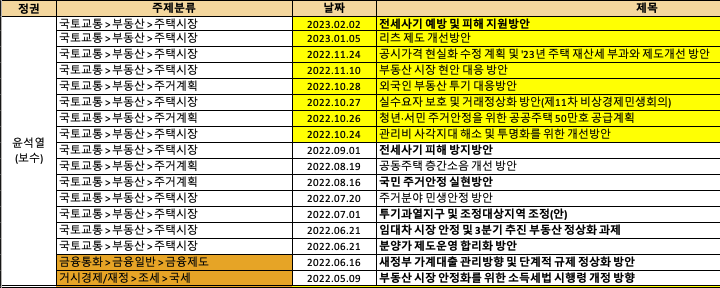

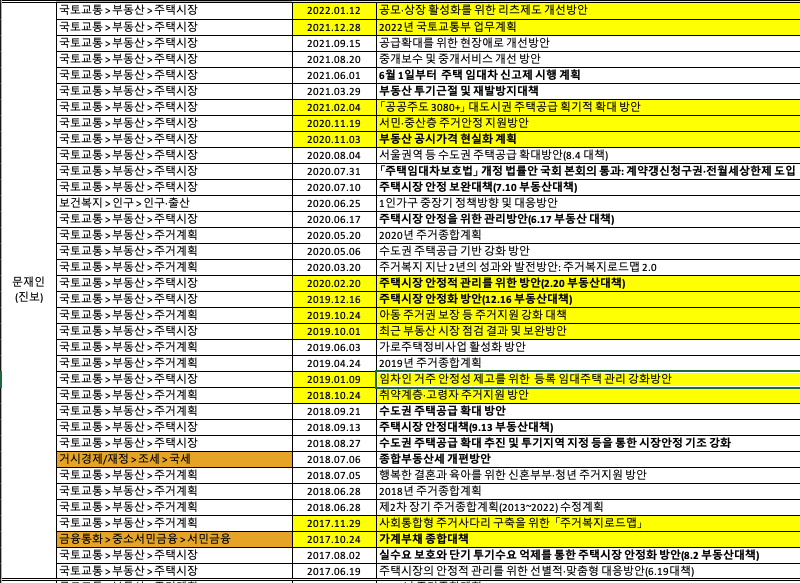

In [162]:
Image('data_1/6.png')
Image('data_1/7.png')

# 최종

# 강남구 계절별 평균 보증금 비교 (mean 적용시) -> 평균적으로 봤을 때 결과

In [154]:
# 월별로 계절 그룹화 함수 정의
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

# 계약년원일['Cont_Date'] 에서 연도와 월 정보를 추출하여 컬럼 추가
df['year'] = df['Cont_Date'].dt.year
df['month'] = df['Cont_Date'].dt.month
df['4seasons'] = df['month'].apply(get_season)

# 연도별, 월별, 계절별로 그룹화
grouped_by_season = df.groupby(['year', 'month', '4seasons'])[['y', 'InterestRate']].mean().reset_index()

# 중복값 제거
grouped_by_season = grouped_by_season.drop_duplicates()

# IQR을 계산하여 이상치 제거
Q1 = grouped_by_season['y'].quantile(0.25)
Q3 = grouped_by_season['y'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_grouped = grouped_by_season[(grouped_by_season['y'] >= lower_bound) & (grouped_by_season['y'] <= upper_bound)]

# 값들을 반올림하고 소수점 2번째 자리까지 나타내기
filtered_grouped['y'] = filtered_grouped['y'].round(2)
filtered_grouped['InterestRate'] = filtered_grouped['InterestRate'].round(2)

print(filtered_grouped)

    year  month 4seasons         y  InterestRate
0   2018      1   Winter  50856.64          3.47
1   2018      2   Winter  51575.44          3.46
2   2018      3   Spring  49033.70          3.45
3   2018      4   Spring  49354.18          3.47
4   2018      5   Spring  48379.05          3.49
5   2018      6   Summer  49480.81          3.46
6   2018      7   Summer  51869.18          3.44
7   2018      8   Summer  52031.47          3.36
8   2018      9     Fall  51363.93          3.29
9   2018     10     Fall  54503.88          3.31
10  2018     11     Fall  54740.67          3.28
11  2018     12   Winter  58248.40          3.19
12  2019      1   Winter  51945.99          3.12
13  2019      2   Winter  48266.00          3.08
14  2019      3   Spring  46921.30          3.04
15  2019      4   Spring  47290.99          2.98
16  2019      5   Spring  47871.47          2.93
17  2019      6   Summer  49543.18          2.74
18  2019      7   Summer  53526.71          2.64
19  2019      8   Su

## 강남구 계절별  평균 보증금 최종 시각화 (대출이자율 제외 결정)

    * 이자율 눈금 범위도 더 추가해서 해봤지만 안됨. -> 이자율 선 그래프가 변동이 없음
    * 막대 그래프와 선 그래프가 겹쳐져 있는 현상을 오버레이(Overlay) 또는 중첩(Overlap) 이라고 표현하는데 없애려고 시도해봤지만 제거는 불가능한 것으로 확인

<Figure size 1000x600 with 0 Axes>

(0.0, 94399.992)

Text(0.5, 1.0, '강남구 계절별 평균 보증금 흐름 비교')

Text(0.5, 0, '연도')

Text(0, 0.5, '보증금')

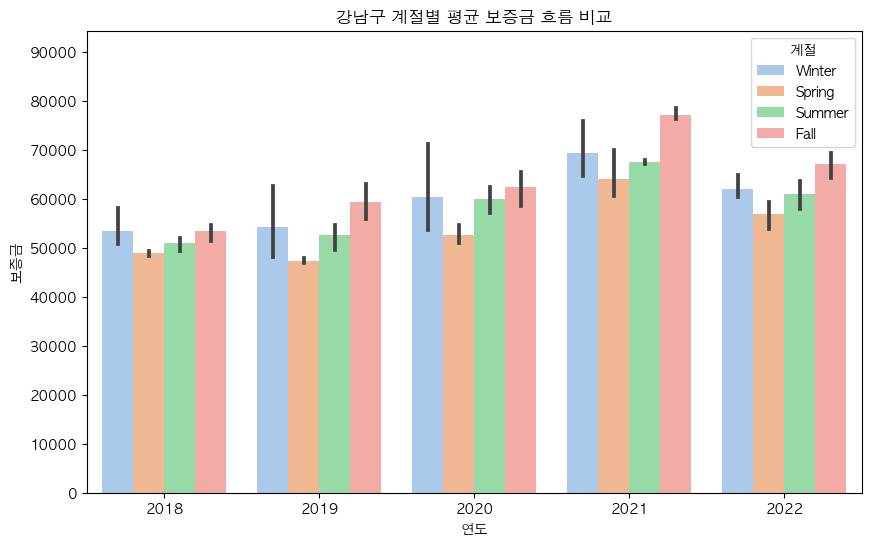

In [156]:
# 이자율 제외 후 시각화 설정
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='year', y='y', hue='4seasons', data=filtered_grouped, palette='pastel')

# y 축 범위 설정 및 눈금 설정
min_y = filtered_grouped['y'].min()
max_y = filtered_grouped['y'].max()
ax.set_ylim(0, max_y + 0.2 * max_y)
ax.set_yticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000])

plt.title('강남구 계절별 평균 보증금 흐름 비교')
plt.xlabel('연도')
plt.ylabel('보증금')

# 범례 설정
ax.legend(title='계절')

plt.show()

## 강남구 계절별 평균 보증금 흐름 비교 결론 

     평균 보증금이 높은 연도별과 계절
    1) 2018년: 겨울
    2) 2019년, 2020년, 2021년, 2022년: 가을
    
    평균 보증금이 낮은 연도별과 계절
    1) 2018년, 2019년, 2020년, 2021년, 2022년: 봄
    

## 이자율만 별도로 빼서 버전 (Just in case!)

<Figure size 1000x600 with 0 Axes>

(1.8900000000000001, 5.32)

Text(0.5, 1.0, '강남구 계절별 대출 이자율 흐름 비교')

Text(0.5, 0, '연도')

Text(0, 0.5, '대출 이자율')

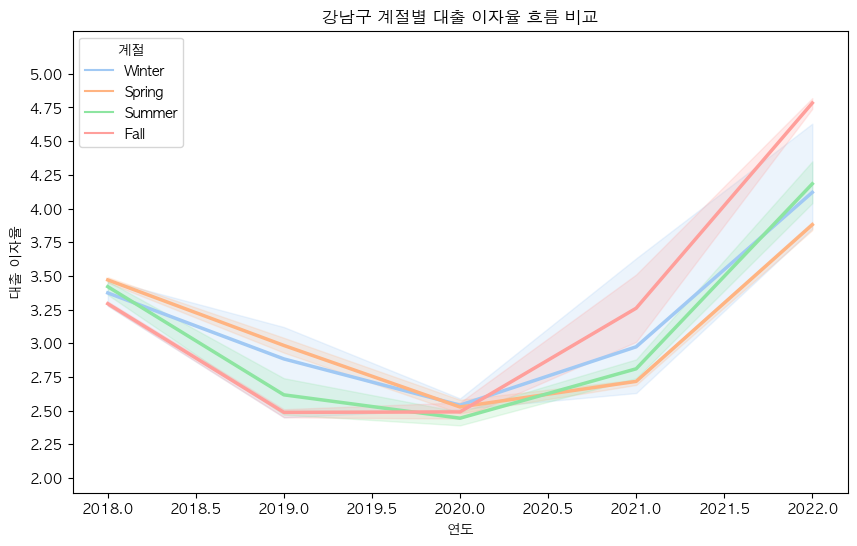

In [109]:
# 시각화 설정
plt.figure(figsize=(10, 6))

# 대출 이자율 선 그래프
ax = sns.lineplot(x='year', y='InterestRate', hue='4seasons', data=filtered_grouped, palette='pastel', linewidth=2.5)

# 대출 이자율 눈금 설정
min_rate = filtered_grouped['InterestRate'].min()
max_rate = filtered_grouped['InterestRate'].max()
ax.set_ylim(min_rate - 0.5, max_rate + 0.5)
ax.set_yticks([2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00])

plt.title('강남구 계절별 대출 이자율 흐름 비교')
plt.xlabel('연도')
plt.ylabel('대출 이자율')

# 범례 설정
ax.legend(title='계절')

plt.show()

## 강남구 계절별 대출 이자율 흐름 비교 

    * 2019년: 가을이 가장 이자율이 낮았음.
    * 2020년: 여름에도 이자율 가장 낮았음.
    * 2020년 가을부터 이자율 급 증가.

# 정권 -> Additional information

In [157]:
from IPython.display import Image

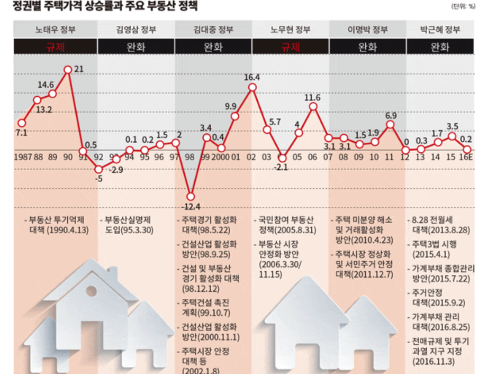

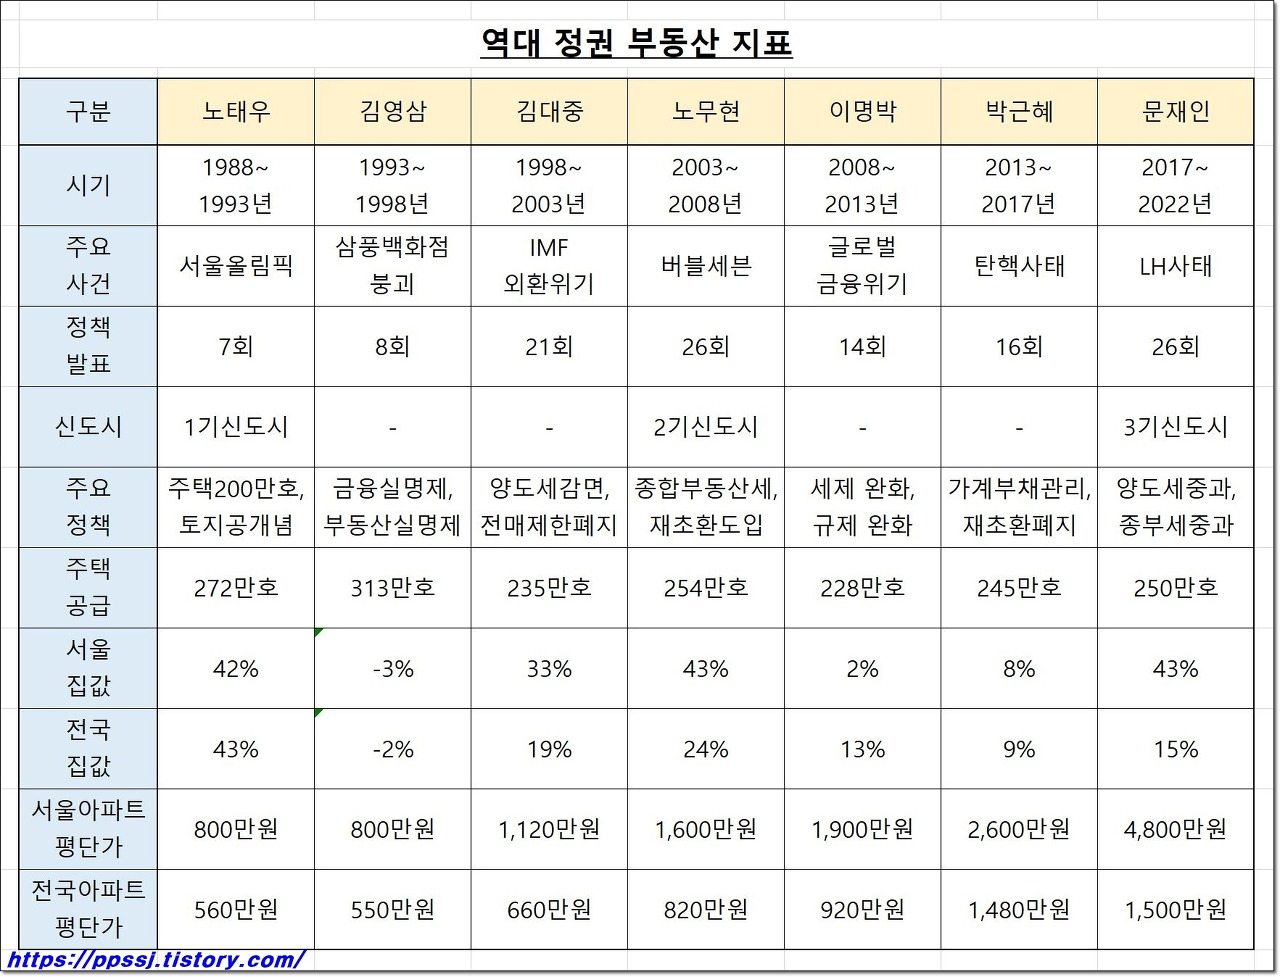

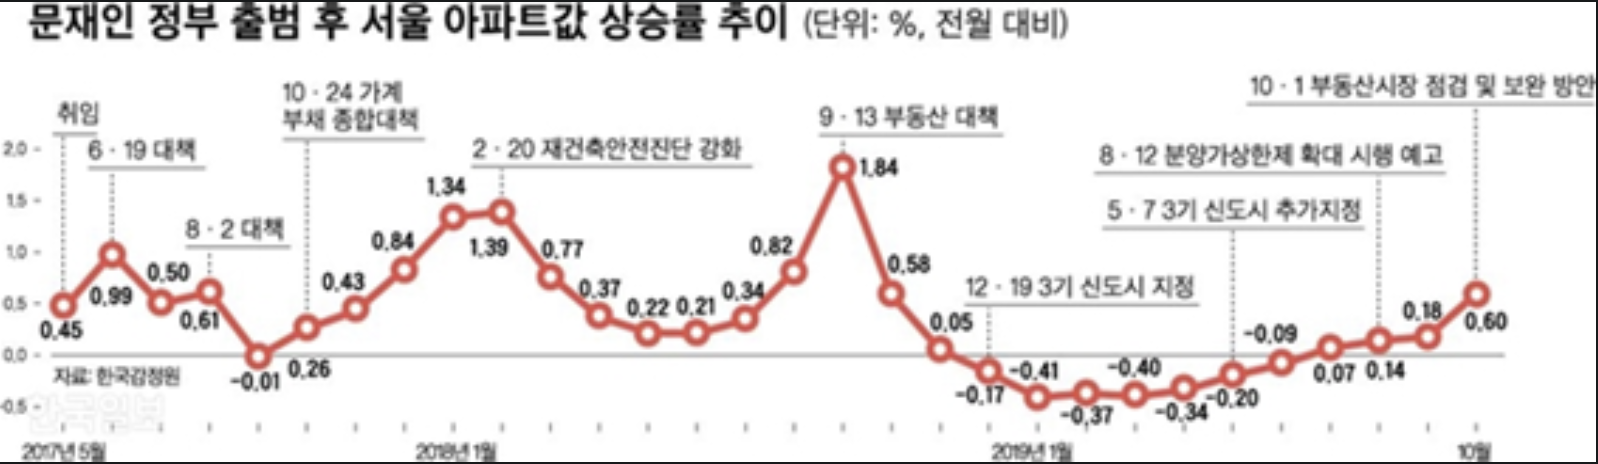

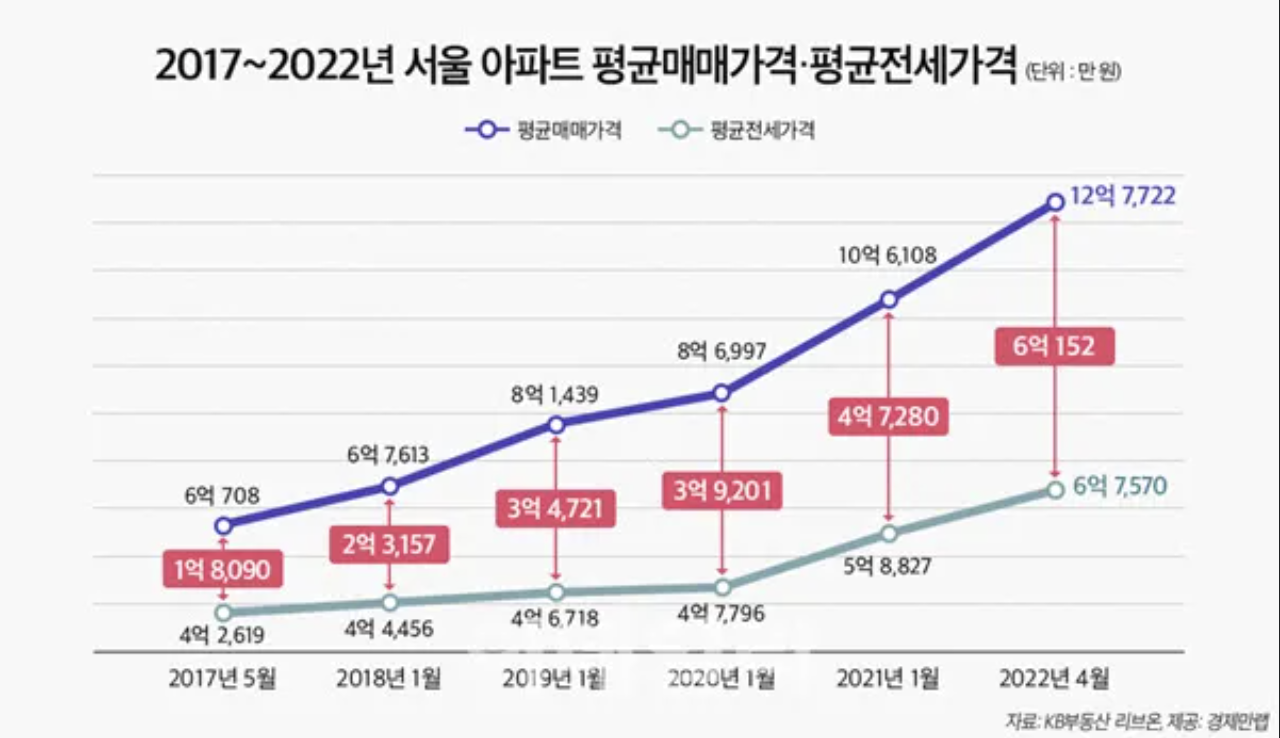

In [159]:
Image('data_1/5.jpeg')
Image('data_1/2.jpeg')
Image('data_1/3.png')
Image('data_1/4.png')

### 확인 해본 부분들 

* 2017년 6월 ~ 2019년 12월까지 정부는 19번의 부동산 시장 안정화 정책을 발표했지만 결과는 집값 안정화에 영향을 크게 미치지 못했음. 

* 2017년 5월 ~ 2019년 10월까지 서울 집값은 평균 11.01%가 상승.

* 2020년부터 GDP 대비 부동산 세금 부담이 OECD 38개국 중 1위를 기록하기 시작함. 2021년 자료 기준으로, 양도세를 제외해도 4.5%로 1위이고, 양도세를 포함해도 6.3%로 1위. 특히 양도세를 포함했을 경우 2위인 영국(4.34%)보다도 2%p 가까이 높아 압도적 1위를 기록 (원래 OECD 3위였음)


### 외국인 한국 부동산 매입 관련 이슈

* 특히 한국 부동산 시장에 대해 한국인들의 매수를 규제하는 대출규제 정책을 사용하고 있었지만 외국인이 한국 부동산을 사는 경우 규제가 없었음.즉 대출 규제는 한국 국내은행 규제하는 것, 외국인이 외국 은행해서 대출을 받아 한국 부동산을 매입하는 것은 규제 대상이 아님. 

* 2020년 8월 강남 3구에 133건의 외국인 부동산 매입이 신고되 최고치 기록

* 2020년 한 해 중국인이 대한민국에서 사들인 부동산 건수는 13,788건으로, 전체 외국인 한국 부동산 매입건수 26,836건의 51.3%에 달함.





In [47]:
# AD_Code'와 'Admin_District' 컬럼을 기준으로 매출을 합산하여 일치하는 정보를 추출
matching_info = df.groupby(['AD_Code', 'Admin_District'])['y'].mean().reset_index()
print(matching_info)

    AD_Code Admin_District             y
0         0            개포동  55286.293581
1         1            논현동  36703.247508
2         2            대치동  74517.318360
3         3            도곡동  90857.303962
4         4            삼성동  66120.473858
5         5            세곡동  45321.590376
6         6            수서동  49011.897609
7         7            신사동  34217.506158
8         8           압구정동  87063.072958
9         9            역삼동  44305.838342
10       10            율현동  37152.471279
11       11            일원동  59289.565163
12       12            자곡동  34561.044190
13       13            청담동  73014.908380


In [48]:
# 강남구 평균 보증금 top 5 까지 확인
top_5_highest = matching_info.nlargest(5, 'y')
print(top_5_highest)

    AD_Code Admin_District             y
3         3            도곡동  90857.303962
8         8           압구정동  87063.072958
2         2            대치동  74517.318360
13       13            청담동  73014.908380
4         4            삼성동  66120.473858
